CLASSIFICATION AND PREDICTIVE MODELLING ON THE CUSTOMER CHURN DATASET

First let us load the required packages for this project.

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Next we import the dataset.

In [61]:
churn = pd.read_csv("Bank Customer Churn Prediction.csv")
churn.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


EXploratory Data Analysis

In [62]:
churn.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [63]:
churn.shape

(10000, 12)

In [64]:
churn.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [65]:
churn.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

([<matplotlib.patches.Wedge at 0x2880d18cfd0>,
 [Text(-0.8823431426537007, 0.6568642010431011, 'No churn'),
  Text(0.8823431426537006, -0.6568642010431012, 'Churn')])

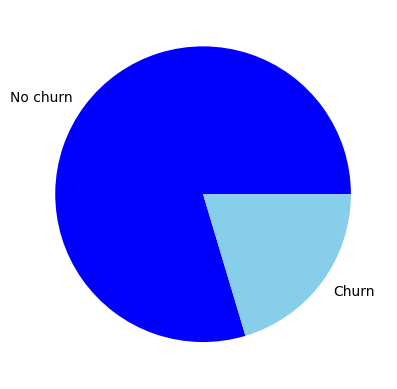

In [66]:
plt.pie(churn['churn'].value_counts(),labels= ('No churn', 'Churn'), colors=('blue','skyblue'))

Now lets us check the correlation among the present variables

C:\Users\Miss. Parmuat\AppData\Local\Temp\ipykernel_1864\1203429736.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = churn.corr()


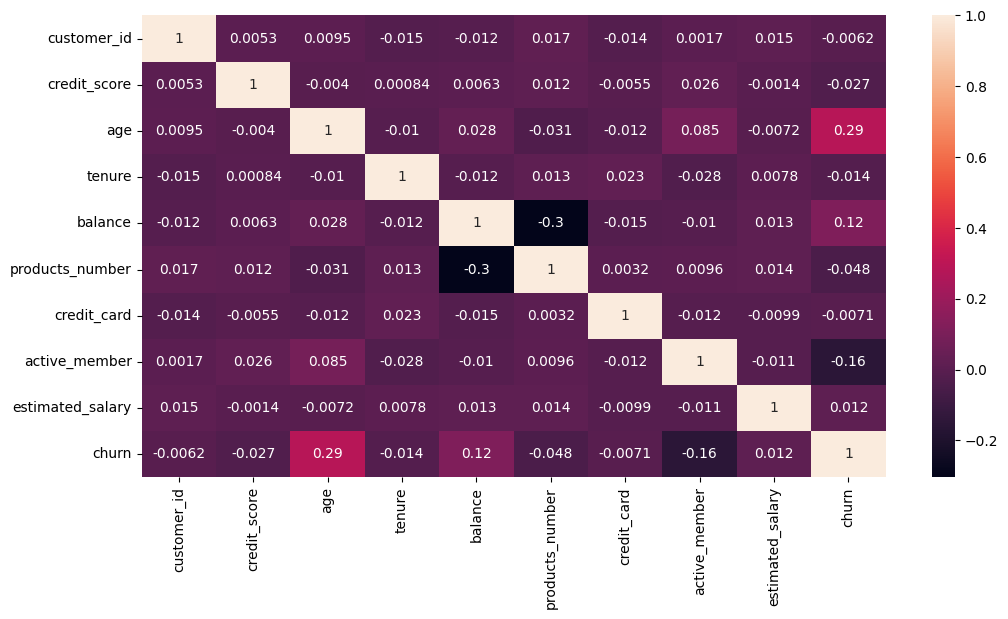

In [67]:
corr = churn.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot= True)
plt.show()

The age variable seems to show the strongest correlation with churn than the other variables.

Let us see what countries are represented in this dataset.

<AxesSubplot: >

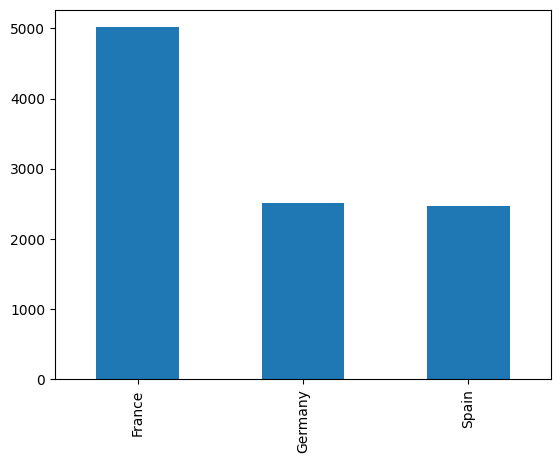

In [68]:
churn['country'].value_counts().plot.bar()

Data Preprocessing

We are going to drop the customer id column because it will not play any role in our goal.

In [71]:
churn = churn.drop(['customer_id'], axis=1)

We are going to peform one hot encoding on the two categorical variables, country and gender. This will increase dimensionality of the dataset. 

In [72]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
#fit the encoder
encoded_columns = encoder.fit_transform(churn[['country','gender']])
churn_encoded =pd.concat([churn.drop(['country','gender'],axis =1),
                       pd.DataFrame(encoded_columns.toarray(),
                                    columns=encoder.get_feature_names_out(['country','gender']))],axis =1)
churn_encoded.head()


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0
